# Feature Engineering

This notebook uses a dataset originally found on Kaggle [here](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training). The data has been manipulated for the purposes of this EDA.

## Setup

In [1]:
import pandas as pd

cafe_df = pd.read_csv('messy_cafe.csv')
cafe_df.head(30)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## Identify Missing Values

### Discover

In [2]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7660 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


### Isolate

In [3]:
cafe_df.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False
9996,False,True,False,True,False,False,True,False
9997,False,False,False,False,False,False,True,False
9998,False,False,False,True,False,False,True,False


In [4]:
cafe_df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2340
Location            3265
Transaction Date     159
dtype: int64

### Reference non-missing values

In [5]:
cafe_df.notnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,False,True,True
9996,True,False,True,False,True,True,False,True
9997,True,True,True,True,True,True,False,True
9998,True,True,True,False,True,True,False,True


## Listwise deletion

### Drop all rows with at least one missing value

In [6]:
cafe_df.dropna(how='any')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


### Drop rows with missing values in a particular column

In [7]:
cafe_df.dropna(subset=['Payment Method'])

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2,4.0,NaN,Cash,NaN,2023-10-20
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


## Replace Missing Values

Deleting rows with missing data presents challenges to building predictive models. Models that are provided training sets with no missing values will have difficulty when test sets contain rows with missing values. Alternatively, replacing the data with suitable values is recommended.

### Categorical Data: Record missing values as a new feature

In [8]:
cafe_df['Unknown Item Sold'] = cafe_df['Item'].isnull()
cafe_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Unknown Item Sold
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,False
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,False
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,False
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,False
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,False
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30,False
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02,True
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02,False
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02,False


### Drop specific column

In [9]:
cafe_df = cafe_df.drop(columns=['Unknown Item Sold'])
cafe_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


### Categorical Data: Replace missing values with strings

In [10]:
cafe_df['Item'] = cafe_df['Item'].fillna(value='Unknown Item')
cafe_df['Item'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Item, Length: 10000, dtype: bool

### Numeric Data: Replace with measures of central tendency

In [11]:
# Convert all data to numeric or NaN
cafe_df['Total Spent'] = pd.to_numeric(cafe_df['Total Spent'], errors='coerce')
# Calculate the series mean
mean_spend = cafe_df['Total Spent'].mean()
median_spend = cafe_df['Total Spent'].median()
# Replace missing values with the mean
cafe_df['Total Spent'] = cafe_df['Total Spent'].fillna(mean_spend)
# Alternativetly, replace missing values with the median
# cafe_df['Total Spent'] = cafe_df['Total Spent'].fillna(median_spend)
cafe_df['Total Spent'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Total Spent, Length: 10000, dtype: bool

## Replace characters in string objects

In [12]:
cafe_df['Transaction ID'] = cafe_df['Transaction ID'].str.replace('TXN_', '')
cafe_df['Transaction ID']

0       1961373
1       4977031
2       4271903
3       7034554
4       3160411
         ...   
9995    7672686
9996    9659401
9997    5255387
9998    7695629
9999    6170729
Name: Transaction ID, Length: 10000, dtype: object

## Balance imbalanced data

In [13]:
cafe_df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,1961373,Coffee,2,2.0,4.000000,Credit Card,Takeaway,2023-09-08
1,4977031,Cake,4,3.0,12.000000,Cash,In-store,2023-05-16
2,4271903,Cookie,4,1.0,8.924352,Credit Card,In-store,2023-07-19
3,7034554,Salad,2,5.0,10.000000,UNKNOWN,UNKNOWN,2023-04-27
4,3160411,Coffee,2,2.0,4.000000,Digital Wallet,In-store,2023-06-11
5,2602893,Smoothie,5,4.0,20.000000,Credit Card,NaN,2023-03-31
6,4433211,UNKNOWN,3,3.0,9.000000,ERROR,Takeaway,2023-10-06
7,6699534,Sandwich,4,4.0,16.000000,Cash,UNKNOWN,2023-10-28
8,4717867,Unknown Item,5,3.0,15.000000,NaN,Takeaway,2023-07-28
9,2064365,Sandwich,5,4.0,20.000000,NaN,In-store,2023-12-31


### Extract into x and y

In [18]:
X = cafe_df.drop(['Payment Method'], axis=1)
y = cafe_df['Payment Method'].fillna('UNKOWN')

### Class distribution

In [19]:
y.value_counts()

Payment Method
Cash              2944
UNKOWN            2340
Digital Wallet    2091
Credit Card       2088
ERROR              277
UNKNOWN            260
Name: count, dtype: int64

<Axes: ylabel='count'>

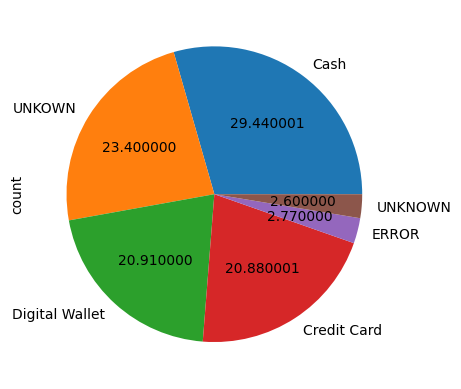

In [20]:
y.value_counts().plot.pie(autopct='%2f')

## Random under-sampling

Reduce the majority class so that it is proportional to the minority.

<Axes: ylabel='count'>

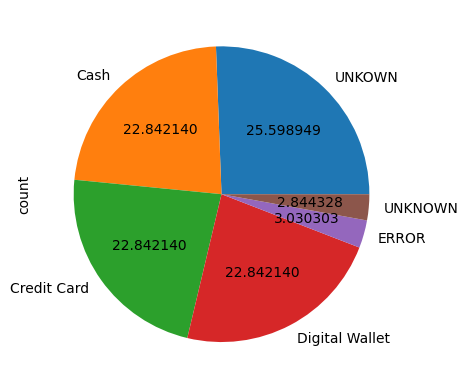

In [25]:
from imblearn.under_sampling import RandomUnderSampler

# sampling_strategy takes either a float or a dict, depending on the value's type
# for floats, an argument of 1 will yield a 1:1 ratio
# for strings, a dict is created to define the target counts by class

target_count = 2088

strategy = {
    'Cash': target_count,
    'Credit Card': target_count,
    'Digital Wallet': target_count,
}

rus = RandomUnderSampler(sampling_strategy=strategy)

# resample data
X_res, y_res = rus.fit_resample(X, y)

res_pie = y_res.value_counts().plot.pie(autopct='%2f')
res_pie